(-0.5, 224.5, 224.5, -0.5)

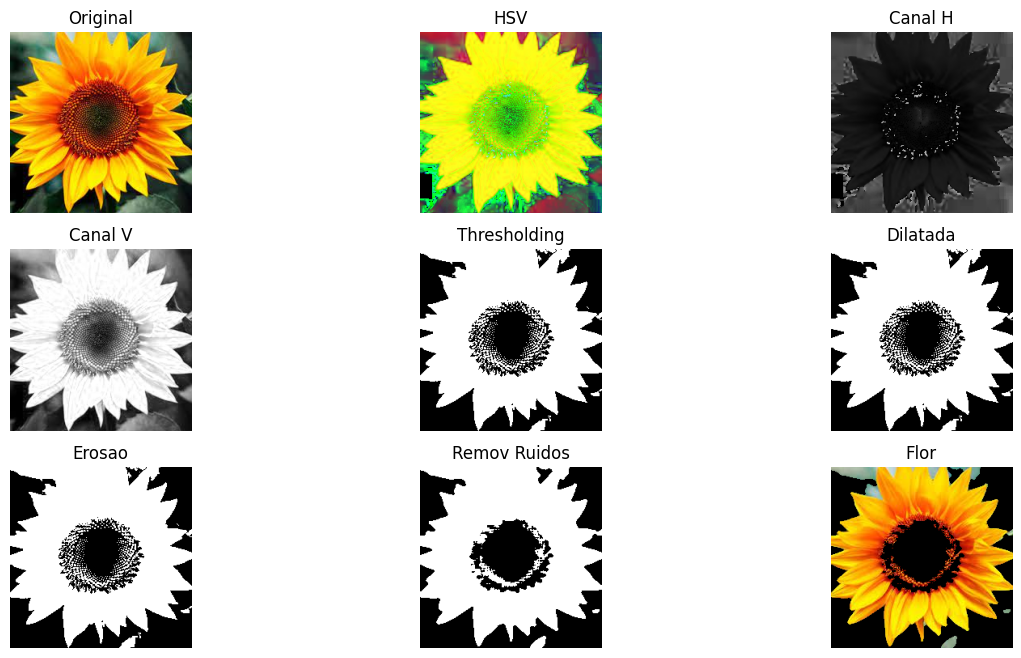

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

image = cv2.imread('./images/girassol.jpeg')

# Passo 1
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Passo 2
H_canal, S_canal, V_canal = cv2.split(hsv_image)

# Passo 3
H_glcms = graycomatrix(H_canal, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], symmetric=True, normed=True)
V_glcms = graycomatrix(V_canal, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], symmetric=True, normed=True)

H_contraste = graycoprops(H_glcms, 'contrast').mean()
H_correlacao = graycoprops(H_glcms, 'correlation').mean()
H_energia = graycoprops(H_glcms, 'energy').mean()
H_homog = graycoprops(H_glcms, 'homogeneity').mean()

V_contraste = graycoprops(V_glcms, 'contrast').mean()
V_correlacao = graycoprops(V_glcms, 'correlation').mean()
V_energia = graycoprops(V_glcms, 'energy').mean()
V_homog = graycoprops(V_glcms, 'homogeneity').mean()

Hstat = [H_contraste, H_correlacao, H_energia, H_homog]
Vstat = [V_contraste, V_correlacao, V_energia, V_homog]

# Passo 4
Hmean = np.mean(Hstat)
Vmean = np.mean(Hstat)

# Passo 5
threshold_channel = H_canal if Hmean > Vmean else V_canal

# Passo 6
_, threshold_image = cv2.threshold(threshold_channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Passo 7
kernel = np.ones((1, 1), np.uint8)
dilatacao = cv2.dilate(threshold_image, kernel, iterations=5)

# Passo 8
erosao = cv2.erode(dilatacao, kernel, iterations=1)

# Passo 9
ruidos = cv2.medianBlur(erosao,5)

# Passo 10
flor_final = cv2.bitwise_and(image, image, mask=ruidos)

################################################################################################################################

titles = ['Original', 'HSV', 'Canal H', 'Canal V', 'Thresholding', 'Dilatada', 'Erosao', 'Remov Ruidos', 'Flor']
images = [image, hsv_image, H_canal, V_canal, threshold_image, dilatacao, erosao, ruidos, flor_final]

plt.figure(figsize=(15, 8))

plt.subplot(3, 3, 1)
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
plt.title(titles[0])
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
plt.title(titles[1])
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB))
plt.title(titles[2])
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(cv2.cvtColor(images[3], cv2.COLOR_BGR2RGB))
plt.title(titles[3])
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(cv2.cvtColor(images[4], cv2.COLOR_BGR2RGB))
plt.title(titles[4])
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(cv2.cvtColor(images[5], cv2.COLOR_BGR2RGB))
plt.title(titles[5])
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(cv2.cvtColor(images[6], cv2.COLOR_BGR2RGB))
plt.title(titles[6])
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(cv2.cvtColor(images[7], cv2.COLOR_BGR2RGB))
plt.title(titles[7])
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(cv2.cvtColor(images[8], cv2.COLOR_BGR2RGB))
plt.title(titles[8])
plt.axis('off')